# Problem Statement

**Linear regression by using Deep Neural network**: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset. 

# Import Library

In [3]:
# Data analysis and visualization
import tensorflow as tf  # Import TensorFlow library for building and training machine learning models
import numpy as np       # Import NumPy library for numerical computations
import pandas as pd      # Import Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib library for data visualization

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn for splitting data into training and testing sets
from sklearn.compose import make_column_transformer    # Import make_column_transformer from scikit-learn for creating column transformers
from sklearn.preprocessing import MinMaxScaler          # Import MinMaxScaler from scikit-learn for feature scaling


2024-04-29 19:46:06.692970: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 19:46:06.693333: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 19:46:06.695769: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 19:46:06.729349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 19:46:07.310902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

# Load Data

In [4]:
# Loading the Boston Housing dataset
# This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts.
# It has been used extensively in regression analysis tasks.
# The dataset is provided by TensorFlow as part of its Keras library.
# The dataset consists of 13 features and 1 target variable (median value of owner-occupied homes in $1000s).
# It is split into training and testing sets, with a specified test_split ratio and a random seed for reproducibility.

# Loading the Boston Housing dataset using tf.keras.datasets.boston_housing.load_data() function
# This function returns the dataset split into training and testing sets, as well as the corresponding target values.
# Parameters:
#   - path: Optional path to the directory where the dataset is stored (default is 'boston_housing.npz' in Keras datasets directory).
#   - test_split: Ratio of the dataset to be used as the test set (default is 0.2, meaning 20% of the data will be used for testing).
#   - seed: Random seed for reproducibility (default is 42).

# Unpacking the returned values into variables:
#   - X_train: Training features (input data) for model training.
#   - y_train: Training labels (target variable) corresponding to X_train.
#   - X_test: Testing features (input data) for evaluating the trained model.
#   - y_test: Testing labels (target variable) corresponding to X_test.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing_npz',  # Custom path to load the dataset from (optional)
    test_split=0.2,  # Ratio of the dataset to be used as the test set
    seed=42  # Random seed for reproducibility
)

# Exploratory Data Analysis

## Initial Observation

In [5]:
# Checking the data shape and type

# This code snippet is used to check the shape and type of the training and testing data arrays,
# as well as the shape and type of the corresponding target variables.

# Each tuple contains two elements:
#   - The first element is a tuple containing the shape of the data array and the type of the data array (X_train, X_test, y_train, y_test).
#   - The second element is the type of the data array (X_train, X_test, y_train, y_test).

# The output of this code snippet will provide information about:
#   - The number of samples and features in the training and testing data arrays.
#   - The data type of the arrays (e.g., NumPy array).
#   - The shape of the target variable arrays.
#   - The data type of the target variable arrays.

# Displaying the shape and type of the training and testing data arrays, as well as the shape and type of the target variable arrays.
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test)),


(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [6]:
# Converting Data to DataFrame

# This code snippet converts the NumPy arrays X_train and y_train to Pandas DataFrame objects.
# Pandas DataFrames provide a tabular data structure that is more convenient for data manipulation, exploration, and analysis.

# Converting training features (X_train) to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Converting training labels (y_train) to a DataFrame
y_train_df = pd.DataFrame(y_train)

# Previewing the first 10 rows of the training data DataFrame (X_train_df)
X_train_df.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [7]:
# View summary of datasets

# This code snippet displays a summary of the datasets X_train_df and y_train_df, which have been converted to Pandas DataFrames.
# The summary includes information such as the data types of columns, the number of non-null values, and memory usage.

# Displaying summary information of the training features DataFrame (X_train_df)
X_train_df.info()

# Printing a line of underscores to visually separate the summaries of X_train_df and y_train_df
print('_'*40)

# Displaying summary information of the training labels DataFrame (y_train_df)
y_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [8]:
# distribution of numerical feature values across the samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Preprocessing

In [9]:
# Create column transformer

# This code snippet creates a column transformer using scikit-learn's make_column_transformer function.
# A column transformer is a preprocessing step that applies different transformations to different columns of the input data.

# Creating a column transformer named ct
# The column transformer applies MinMaxScaler normalization to specific columns of the input data.
# The MinMaxScaler scales each feature to a specified range, typically between 0 and 1.
# The specified columns for normalization are indices [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12] of the input data.
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

# Normalization and data type change

# Applying the column transformer to the training features (X_train) and testing features (X_test)
# The fit_transform method fits the transformer to X_train and transforms X_train.
# The transform method applies the transformer to X_test.
X_train = ct.fit_transform(X_train).astype('float32')  # Normalizing and converting to float32 data type
X_test = ct.transform(X_test).astype('float32')        # Normalizing and converting to float32 data type

# Converting the training and testing labels (y_train and y_test) to float32 data type
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Displaying the distribution of feature values in X_train after normalization
# A DataFrame is created from the normalized X_train and summary statistics are calculated using describe() method
pd.DataFrame(X_train).describe()


,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521906,0.681970,0.241618,0.376561,0.423589,0.625738,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model, Predict, Evaluation

In [10]:
# Reserve data for validation

# This code snippet splits the training data into two subsets: a smaller subset for validation and the rest for training.
# It uses the train_test_split function from scikit-learn to achieve this split.

# Splitting the training data into training and validation sets
# The train_test_split function takes the training features (X_train) and labels (y_train) as input and splits them into training and validation sets.
# Parameters:
#   - X_train: Training features (input data).
#   - y_train: Training labels (target variable).
#   - test_size: Proportion of the dataset to include in the validation set (0.1 means 10% of the data will be reserved for validation).
#   - random_state: Seed for the random number generator for reproducibility.

# Assigning the resulting subsets to variables:
#   - X_train: Subset of training features for model training.
#   - X_val: Subset of training features reserved for validation.
#   - y_train: Subset of training labels corresponding to X_train.
#   - y_val: Subset of training labels reserved for validation.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Displaying the shapes of the training, validation, and testing sets
# This provides information about the number of samples in each set after the split.
# Shapes are displayed as tuples containing the number of samples and features.
# The shape of X_train, X_val, y_train, and y_val are printed respectively.
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((363, 12), (41, 12), (363,), (41,))

## Creating the Model and Optimizing the Learning Rate

learning rate = 0.01,
batch_size = 32,
dense_layers = 2,
hidden_units for Dense_1 layer= 10,
hidden_units for Dense_2 layer = 100

In [11]:
# Set random seed

# This code snippet sets the random seed using TensorFlow's random module.
# Setting the random seed ensures reproducibility of results when running the code, as it initializes the random number generator to a fixed state.

# Setting the random seed to 42
tf.random.set_seed(42)

# Building the model

# This code snippet builds a Sequential model using TensorFlow's Keras API.
# The Sequential model is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.

# Creating a Sequential model named 'model'
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),  # Input layer with 10 units and ReLU activation function
    tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),  # Hidden layer with 100 units and ReLU activation function
    tf.keras.layers.Dense(units=1, name='Prediction')  # Output layer with 1 unit (for regression) and linear activation function
])

# Compiling the model

# Compiling the model using compile method
# The model is configured with a loss function, an optimizer, and evaluation metrics.

model.compile(
    loss=tf.keras.losses.mean_squared_error,  # Mean squared error loss function for regression tasks
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),  # RMSprop optimizer with learning rate of 0.01
    metrics=['mse']  # Mean squared error metric used for evaluation
)

# Training the model

# Training the model using fit method
# The model is trained on the training data (X_train, y_train) for a specified number of epochs.

history = model.fit(
    X_train,  # Training features
    y_train,  # Training labels
    batch_size=32,  # Batch size for training
    epochs=50,  # Number of epochs (iterations over the entire dataset)
    validation_data=(X_val, y_val)  # Validation data to evaluate the model's performance during training
)


Epoch 1/50


/home/ubuntu/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 393.0191 - mse: 393.0191 - val_loss: 120.1491 - val_mse: 120.1491
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.6909 - mse: 77.6909 - val_loss: 66.7031 - val_mse: 66.7031
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.0576 - mse: 49.0576 - val_loss: 53.6807 - val_mse: 53.6807
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.8247 - mse: 44.8247 - val_loss: 48.3389 - val_mse: 48.3389
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.3780 - mse: 41.3780 - val_loss: 42.7594 - val_mse: 42.7594
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.9256 - mse: 37.9256 - val_loss: 37.4944 - val_mse: 37.4944
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.5962 - mse: 34.5962 - val_loss: 32.2477 - val_mse: 32.2477
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.1972 - mse: 31.1972 - val_loss: 28.5469 - val_mse: 28.5469
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

## Model Evaluation

In [12]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()

(22.235537, 24.89756)

In [13]:
# Evaluate the model on the test data

# This code snippet evaluates the trained model on the test data to assess its performance on unseen data.

# Printing a message indicating evaluation on test data
print("Evaluation on Test data \n")

# Evaluating the model on the test data
# The evaluate method computes the loss and metrics of the model on the provided test data (X_test, y_test).
# Parameters:
#   - X_test: Test features
#   - y_test: Test labels
#   - batch_size: Size of batches for evaluation (optional, defaults to 32)

# The evaluate method returns the loss and metrics computed by the model on the test data.
# The loss is assigned to the variable 'loss', and the mean squared error (mse) is assigned to the variable 'mse'.
loss, mse = model.evaluate(X_test, y_test, batch_size=32)

# Printing the evaluation results
print(f"\nModel loss on test set: {loss}")  # Printing the loss on the test set
print(f"Model mean squared error on test set: {(mse):.2f}")  # Printing the mean squared error (rounded to 2 decimal places) on the test set


Evaluation on Test data 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9129 - mse: 17.9129 

Model loss on test set: 20.191787719726562
Model mean squared error on test set: 20.19


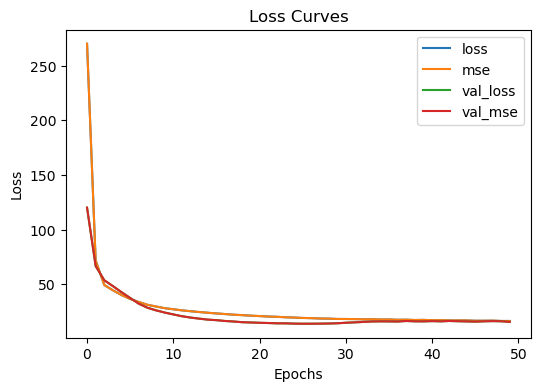

In [14]:
# Plot the loss curves

# This code snippet plots the loss curves during training to visualize how the loss changes over epochs.

# Creating a DataFrame from the history object's history attribute
# The history object contains information about the training metrics recorded during training epochs.
# The history.history attribute is a dictionary containing the training and validation metrics recorded during training.

# The DataFrame is created to easily access and plot the training and validation loss curves.

pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')

# Plotting the loss curves using Matplotlib
# The loss curves are plotted using the plot method of the DataFrame.
# The figsize parameter specifies the size of the plot.
# The xlabel and ylabel parameters label the x-axis and y-axis, respectively.
# The title parameter sets the title of the plot.

plt.show()  # Displaying the plot


## Model Prediction

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# View the first prediction
y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([20.698917], dtype=float32)

/tmp/ipykernel_38884/250464094.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')


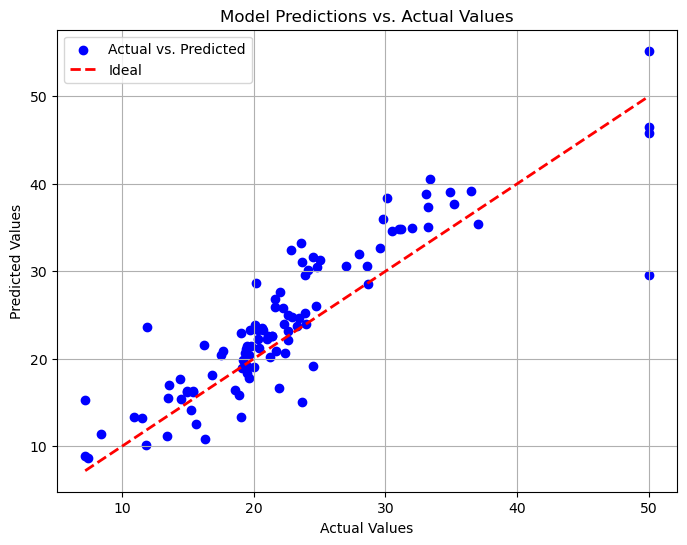

In [16]:
# Model Predictions vs. Actual Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()


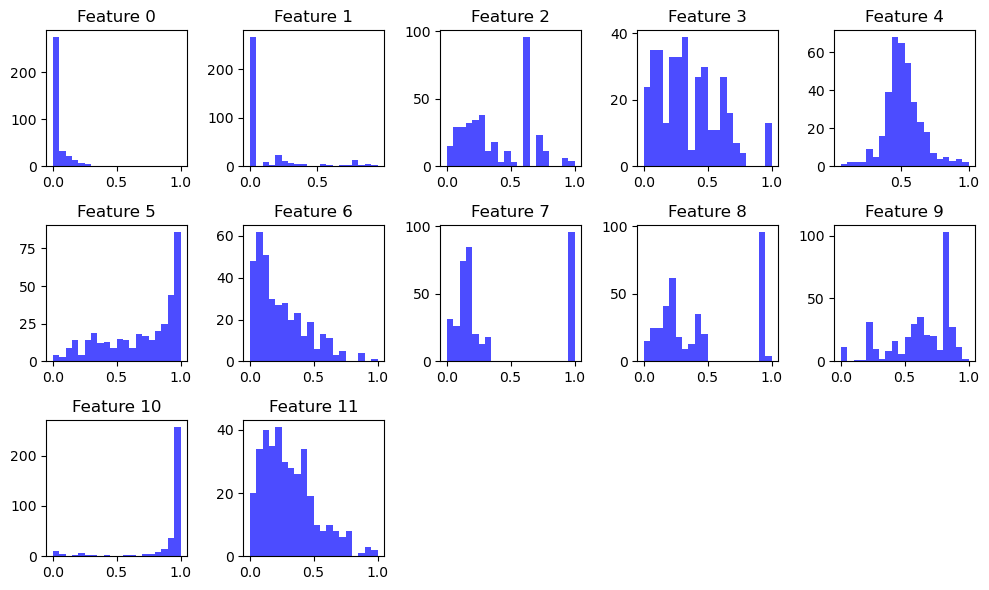

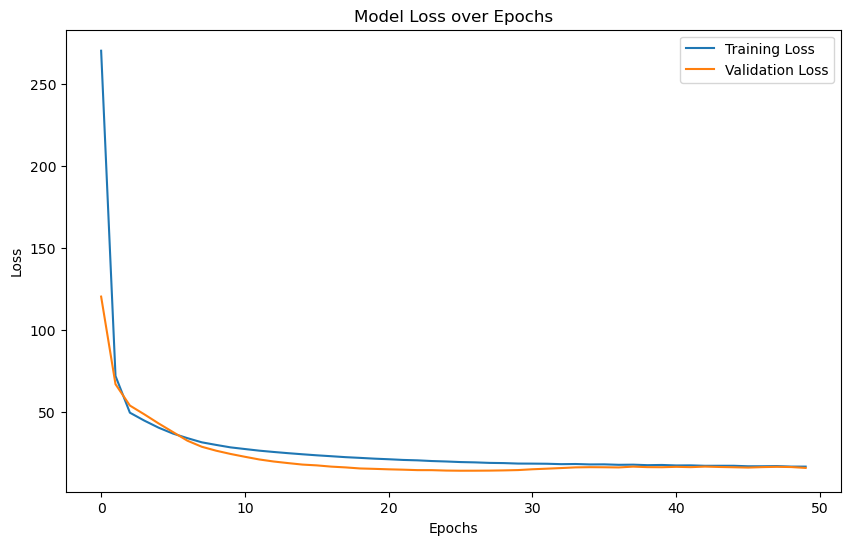

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


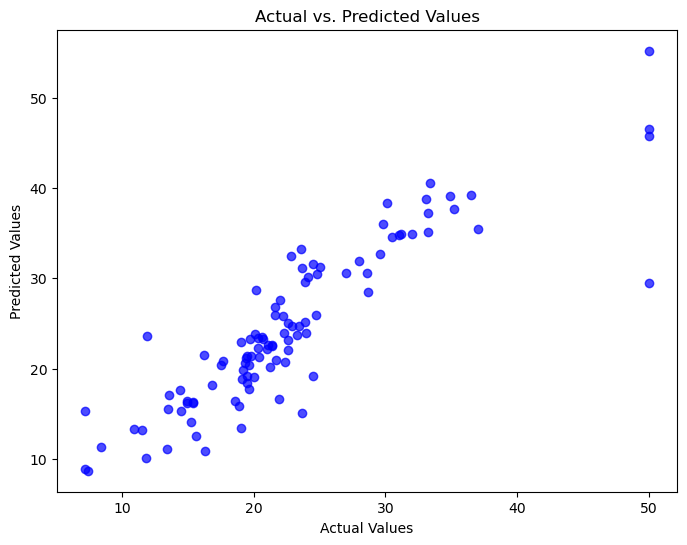

In [17]:
import matplotlib.pyplot as plt

# Histograms for Feature Distribution
plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.subplot(3, 5, i+1)
    plt.hist(X_train[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(f'Feature {i}')
plt.tight_layout()
plt.show()

# Line Plot for Model Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Scatter Plot for Predictions vs. Actual Values
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
